In [1]:
from preamble import *
%matplotlib inline
import mglearn

## Introduction
### Why Machine Learning?
#### Problems Machine Learning Can Solve

#### Knowing Your Task and Knowing Your Data

### Why Python?

### scikit-learn
#### Installing scikit-learn

### Essential Libraries and Tools

#### Jupyter Notebook

#### NumPy

In [2]:
import numpy as np

x = np.array([[1, 2, 3], [4, 5, 6]])
print("x:\n{}".format(x))

x:
[[1 2 3]
 [4 5 6]]


#### SciPy

In [3]:
from scipy import sparse

# Create a 2D NumPy array with a diagonal of ones, and zeros everywhere else
eye = np.eye(4)
print("NumPy array:\n", eye)

NumPy array:
 [[1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]]


In [4]:
# Convert the NumPy array to a SciPy sparse matrix in CSR format
# Only the nonzero entries are stored
sparse_matrix = sparse.csr_matrix(eye)
print("\nSciPy sparse CSR matrix:\n", sparse_matrix)


SciPy sparse CSR matrix:
   (0, 0)	1.0
  (1, 1)	1.0
  (2, 2)	1.0
  (3, 3)	1.0


In [5]:
data = np.ones(4)
row_indices = np.arange(4)
col_indices = np.arange(4)
eye_coo = sparse.coo_matrix((data, (row_indices, col_indices)))
print("COO representation:\n", eye_coo)

COO representation:
   (0, 0)	1.0
  (1, 1)	1.0
  (2, 2)	1.0
  (3, 3)	1.0


#### matplotlib

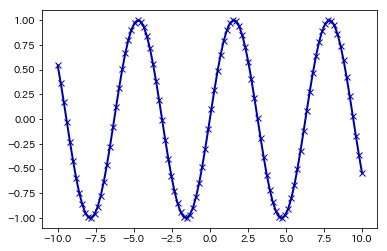

In [6]:
%matplotlib inline
import matplotlib.pyplot as plt

# Generate a sequence of numbers from -10 to 10 with 100 steps in between
x = np.linspace(-10, 10, 100)
# Create a second array using sine
y = np.sin(x)
# The plot function makes a line chart of one array against another
plt.plot(x, y, marker="x")

#### pandas

In [7]:
import pandas as pd

# create a simple dataset of people
data = {'Name': ["John", "Anna", "Peter", "Linda"],
        'Location' : ["New York", "Paris", "Berlin", "London"],
        'Age' : [24, 13, 53, 33]
       }

data_pandas = pd.DataFrame(data)
# IPython.display allows "pretty printing" of dataframes
# in the Jupyter notebook
display(data_pandas)

,Name,Location,Age
0,John,New York,24
1,Anna,Paris,13
2,Peter,Berlin,53
3,Linda,London,33


In [8]:
# Select all rows that have an age column greater than 30
display(data_pandas[data_pandas.Age > 30])

,Name,Location,Age
2,Peter,Berlin,53
3,Linda,London,33


#### mglearn

### Python 2 versus Python 3

### Versions Used in this Book

In [9]:
import sys
print("Python version:", sys.version)

import pandas as pd
print("pandas version:", pd.__version__)

import matplotlib
print("matplotlib version:", matplotlib.__version__)

import numpy as np
print("NumPy version:", np.__version__)

import scipy as sp
print("SciPy version:", sp.__version__)

import IPython
print("IPython version:", IPython.__version__)

import sklearn
print("scikit-learn version:", sklearn.__version__)

"""
20190301

Python version: 3.7.2 (default, Dec 29 2018, 00:00:04) 
[Clang 4.0.1 (tags/RELEASE_401/final)]
pandas version: 0.24.1
matplotlib version: 3.0.2
NumPy version: 1.15.4
SciPy version: 1.2.1
IPython version: 7.3.0
scikit-learn version: 0.20.2
"""

Python version: 3.6.8 |Anaconda, Inc.| (default, Dec 29 2018, 19:04:46) 
[GCC 4.2.1 Compatible Clang 4.0.1 (tags/RELEASE_401/final)]
pandas version: 0.24.2
matplotlib version: 3.0.3
NumPy version: 1.16.3
SciPy version: 1.2.1
IPython version: 7.5.0
scikit-learn version: 0.20.3


'\n20190301\n\nPython version: 3.7.2 (default, Dec 29 2018, 00:00:04) \n[Clang 4.0.1 (tags/RELEASE_401/final)]\npandas version: 0.24.1\nmatplotlib version: 3.0.2\nNumPy version: 1.15.4\nSciPy version: 1.2.1\nIPython version: 7.3.0\nscikit-learn version: 0.20.2\n'

### 最初のアプリケーション：アイリスのクラス分類  
本節では、かんたんな機械学習アプリケーションを通じて最初のモデルを構築する。  
その過程でいくつかの重要なコンセプトと用語を紹介する。  
アマチュア園芸家が見つけたアイリスの花の種類を分別したいとしよう。  
彼女は集めたアイリスについて、花弁の長さと幅、ガクの長さと幅をセンチメートル単位で測定した。  
彼女は、専門の植物学者が、setosa, versicolor, virginica に分類したアイリスの測定結果も持っているとしよう。  
これらの種に関してはアイリスの分類は間違いがないものとする。さらに、この園芸家が発見するアイリスはこの3種類のうちの１つだと仮定しよう。  
**ここでの目標は、新しく見つけたアイリスの種類を予測するために、種類がわかっているアイリスの測定値を用いて機械学習モデルを構築することである。**  

種類がわかっているアイリスの測定結果があるので、これは**教師あり学習問題**となる。  
この問題は**クラス分類（classification）問題の一例**となる。出力は**クラス（class）**と呼ばれる。データセット中のすべてのアイリスは３つのクラスのうちの１つに属するので、この問題は**3クラス分類問題**となる。  
１つのデータポイント（１つのアイリス）に対して望まれる出力は、その花の種類だ。特定のデータポイントの属する種類を**ラベル（label）**と呼ぶ。  

### A First Application: Classifying Iris Species
![sepal_petal](images/iris_petal_sepal.png)
#### Meet the Data

In [27]:
from sklearn.datasets import load_iris
iris_dataset = load_iris()

In [28]:
print("Keys of iris_dataset: \n{}".format(iris_dataset.keys()))

Keys of iris_dataset: 
dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])


In [29]:
# データフレームとして表示：feature_names
pd.DataFrame(iris_dataset.data, columns=iris_dataset.feature_names)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
5,5.4,3.9,1.7,0.4
6,4.6,3.4,1.4,0.3
7,5.0,3.4,1.5,0.2
8,4.4,2.9,1.4,0.2
9,4.9,3.1,1.5,0.1


In [30]:
print(iris_dataset['DESCR'] + "\n...")

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [31]:
print("Target names:", iris_dataset['target_names'])

Target names: ['setosa' 'versicolor' 'virginica']


In [32]:
print("Feature names:\n", iris_dataset['feature_names'])

Feature names:
 ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [33]:
print("Type of data:", type(iris_dataset['data']))

Type of data: <class 'numpy.ndarray'>


In [34]:
print("Shape of data:", iris_dataset['data'].shape)

Shape of data: (150, 4)


In [35]:
print("First five rows of data:\n", iris_dataset['data'][:5])

First five rows of data:
 [[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]


In [36]:
print("Type of target:", type(iris_dataset['target']))

Type of target: <class 'numpy.ndarray'>


In [37]:
print("Shape of target:", iris_dataset['target'].shape)

Shape of target: (150,)


In [38]:
print("Target:\n", iris_dataset['target'])
# 0 -> setosa
# 1 -> versicolor
# 2 -> virginica
# を意味する

Target:
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


#### Measuring Success: Training and Testing Data

In [39]:
# データセットを訓練データとテストデータに分割する。
# 75%を訓練データ、25%をテストデータ。
# train_test_split() は、分割を行う前に、擬似乱数を用いてデータセットをシャッフルする。
# random_stateパラメータを用いることで、擬似乱数生成器に同じシードを渡している。これによって出力が決定的になり、常に同じ結果が得られるようになる。
# 本書では、乱数を用いる際には常にこのようにrandom_stateを固定して用いる。
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    iris_dataset['data'], iris_dataset['target'], random_state=0)

In [40]:
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)

X_train shape: (112, 4)
y_train shape: (112,)


In [41]:
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

X_test shape: (38, 4)
y_test shape: (38,)


#### First Things First: Look at Your Data

In [42]:
"""
最初にすべきこと：データをよく観察する
機械学習モデルを構築する前に、データを検査したほうがよい。
データを検査する最良の方法は、可視化である。
その方法の１つが散布図である。
散布図とは、x軸にある特徴量を、y軸にもう１つの特徴量を取り、データポイントごとにドットをプロットするものである。
ペアプロットは、すべての組み合わせ可能な特徴量の組み合わせをプロットする。

ペアプロットを作成するには、Numpy配列を、pandasのDataFrameに変換する。pandasは、scatter_matrixと呼ばれるペアプロットを作成する関数を持つ。
グラフマトリックスの対角部分には、個々の特徴量のヒストグラムが描画される。



""" 

# create dataframe from data in X_train
# label the columns using the strings in iris_dataset.feature_names
iris_dataframe = pd.DataFrame(X_train, columns=iris_dataset.feature_names)
iris_dataframe

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.9,3.0,4.2,1.5
1,5.8,2.6,4.0,1.2
2,6.8,3.0,5.5,2.1
3,4.7,3.2,1.3,0.2
4,6.9,3.1,5.1,2.3
5,5.0,3.5,1.6,0.6
6,5.4,3.7,1.5,0.2
7,5.0,2.0,3.5,1.0
8,6.5,3.0,5.5,1.8
9,6.7,3.3,5.7,2.5


'\n3つのクラスは花弁とガクの測定結果で比較的よく分離していることが分かる。\nこれは、うまく分離できるように機械学習モデルを訓練することができる可能性が高いことを意味する。\n'

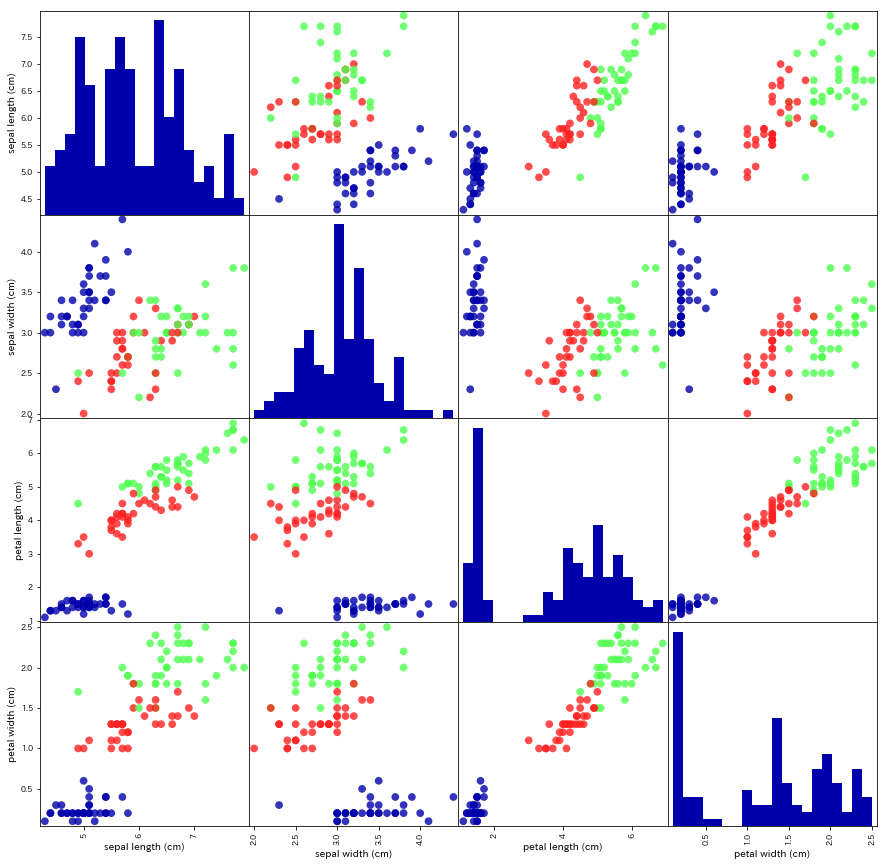

In [43]:
# データフレームからscatter matrixを作成し、y_trainに従って色をつける
# create a scatter matrix from the dataframe, color by y_train
pd.plotting.scatter_matrix(iris_dataframe, c=y_train, figsize=(15, 15),
                           marker='o', hist_kwds={'bins': 20}, s=60,
                           alpha=.8, cmap=mglearn.cm3)

"""
3つのクラスは花弁とガクの測定結果で比較的よく分離していることが分かる。
これは、うまく分離できるように機械学習モデルを訓練することができる可能性が高いことを意味する。
"""

#### 最初のモデル：k-最近傍法  
k-Nearest Neighbors によるクラス分類を用いる。

#### Building Your First Model: k-Nearest Neighbors

In [44]:
# 最初のモデル：k-最近傍法 k-Nearest Neighbors によるクラス分類

from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)

"""
knnオブジェクトは、訓練データからモデルを構築する際に用いられるアルゴリズムと、新しいデータポイントに対して予測するためのアルゴリズムをカプセル化している。
さらに、訓練データからアルゴリズムが抽出した情報も保持する。
"""

'\nknnオブジェクトは、訓練データからモデルを構築する際に用いられるアルゴリズムと、新しいデータポイントに対して予測するためのアルゴリズムをカプセル化している。\nさらに、訓練データからアルゴリズムが抽出した情報も保持する。\n'

In [45]:
# fit関数は、訓練データのNumpy配列X_trainと、それに対応する訓練ラベルのNumpy配列y_trainを引数にとる
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=1, p=2,
           weights='uniform')

#### Making Predictions

In [46]:
# 予測を行う
# 野生のアイリスを見つけたとする。このアイリスの品種はなんだろうか？
X_new = np.array([[5, 2.9, 1, 0.2]])
print("X_new.shape:", X_new.shape)

X_new.shape: (1, 4)


In [47]:
prediction = knn.predict(X_new)
print("Prediction:", prediction)
print("Predicted target name:",
       iris_dataset['target_names'][prediction])

"""
我々のモデルは新しいアイリスをクラス0、すなわちsetosaであると判断した。
しかし、このモデルを信じてよいか、どうしたら分かるだろうか？
"""

Prediction: [0]
Predicted target name: ['setosa']


'\n我々のモデルは新しいアイリスをクラス0、すなわちsetosaであると判断した。\nしかし、このモデルを信じてよいか、どうしたら分かるだろうか？\n'

#### Evaluating the Model

In [48]:
# モデルの評価
# モデルがどのくらいうまく機能しているかを、精度（accuracy）を計算して測定することができる。
# 精度は、ただしく品種を予測できたアイリスの割合である。
y_pred = knn.predict(X_test)
print("Test set predictions:\n", y_pred)

Test set predictions:
 [2 1 0 2 0 2 0 1 1 1 2 1 1 1 1 0 1 1 0 0 2 1 0 0 2 0 0 1 1 0 2 1 0 2 2 1 0
 2]


In [49]:
print("Test set score: {:.2f}".format(np.mean(y_pred == y_test)))

Test set score: 0.97


In [50]:
# knnオブジェクトのscoreメソッドを用いてもよい。
# このメソッドは、テストセットに対する精度を計算してくれる。
print("Test set score: {:.2f}".format(knn.score(X_test, y_test)))

Test set score: 0.97


### Summary and Outlook

In [51]:
X_train, X_test, y_train, y_test = train_test_split(
    iris_dataset['data'], iris_dataset['target'], random_state=0)

knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)

print("Test set score: {:.2f}".format(knn.score(X_test, y_test)))

Test set score: 0.97
